In [1]:
import cv2 as cv
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import glob
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense

In [24]:
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show() 

In [27]:
def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

In [3]:
#讀取train圖片
p_img_train = os.getcwd() + '/train/'
image_ls_train = list()
for i in range(5):
    image_sin_train = [cv.imread(file) for file in glob.glob(p_img_train + str(i) + '/' + '*' + '.png')]
    image_ls_train.append(image_sin_train)


#讀取test圖片
p_img_test = os.getcwd() + '/test/'
image_ls_test = list()
for i in range(5):
    image_sin_test = [cv.imread(file) for file in glob.glob(p_img_test + str(i) + '/' + '*' + '.png')]
    image_ls_test.append(image_sin_test)
    

#cv.imshow('input', image_ls_train)
#cv.waitKey(0)
#cv.destroyWindow

In [6]:
#讀取五種骨刺等級X光片
images_train = list()
for i in range(5):
    for j in range(len(image_ls_train[i])):
        images_train.append(image_ls_train[i][j])

In [7]:
#讀取五種骨刺等級X光片
images_test = list()
for i in range(5):
    for j in range(len(image_ls_test[i])):
        images_test.append(image_ls_test[i][j])

In [10]:
print(images_train[0])
images_train[0].shape
len(images_train)

[[[ 93  93  93]
  [ 96  96  96]
  [ 98  98  98]
  ...
  [ 76  76  76]
  [ 74  74  74]
  [ 69  69  69]]

 [[ 95  95  95]
  [ 96  96  96]
  [ 99  99  99]
  ...
  [ 73  73  73]
  [ 74  74  74]
  [ 69  69  69]]

 [[ 95  95  95]
  [ 98  98  98]
  [ 99  99  99]
  ...
  [ 73  73  73]
  [ 70  70  70]
  [ 67  67  67]]

 ...

 [[ 19  19  19]
  [ 29  29  29]
  [ 39  39  39]
  ...
  [101 101 101]
  [ 97  97  97]
  [ 98  98  98]]

 [[ 17  17  17]
  [ 28  28  28]
  [ 38  38  38]
  ...
  [104 104 104]
  [103 103 103]
  [102 102 102]]

 [[ 19  19  19]
  [ 27  27  27]
  [ 36  36  36]
  ...
  [106 106 106]
  [106 106 106]
  [ 97  97  97]]]


5778

In [13]:
#圖片歸一化/標準化
image_uni_train = (images_train - np.min(images_train)) / (np.max(images_train) - np.min(images_train))
image_uni_test = (images_test - np.min(images_test)) / (np.max(images_test) - np.min(images_test))

In [16]:
print(image_uni_train)

[[[[0.36470588 0.36470588 0.36470588]
   [0.37647059 0.37647059 0.37647059]
   [0.38431373 0.38431373 0.38431373]
   ...
   [0.29803922 0.29803922 0.29803922]
   [0.29019608 0.29019608 0.29019608]
   [0.27058824 0.27058824 0.27058824]]

  [[0.37254902 0.37254902 0.37254902]
   [0.37647059 0.37647059 0.37647059]
   [0.38823529 0.38823529 0.38823529]
   ...
   [0.28627451 0.28627451 0.28627451]
   [0.29019608 0.29019608 0.29019608]
   [0.27058824 0.27058824 0.27058824]]

  [[0.37254902 0.37254902 0.37254902]
   [0.38431373 0.38431373 0.38431373]
   [0.38823529 0.38823529 0.38823529]
   ...
   [0.28627451 0.28627451 0.28627451]
   [0.2745098  0.2745098  0.2745098 ]
   [0.2627451  0.2627451  0.2627451 ]]

  ...

  [[0.0745098  0.0745098  0.0745098 ]
   [0.11372549 0.11372549 0.11372549]
   [0.15294118 0.15294118 0.15294118]
   ...
   [0.39607843 0.39607843 0.39607843]
   [0.38039216 0.38039216 0.38039216]
   [0.38431373 0.38431373 0.38431373]]

  [[0.06666667 0.06666667 0.06666667]
   [0.1

In [17]:
#轉成向量
image_vector_train = image_uni_train.reshape(len(image_uni_train), 224,224,3).astype('float32')
image_vector_test = image_uni_test.reshape(len(image_uni_test), 224,224,3).astype('float32')

In [19]:
print(image_vector_train[0])

[[[0.3647059  0.3647059  0.3647059 ]
  [0.3764706  0.3764706  0.3764706 ]
  [0.38431373 0.38431373 0.38431373]
  ...
  [0.29803923 0.29803923 0.29803923]
  [0.2901961  0.2901961  0.2901961 ]
  [0.27058825 0.27058825 0.27058825]]

 [[0.37254903 0.37254903 0.37254903]
  [0.3764706  0.3764706  0.3764706 ]
  [0.3882353  0.3882353  0.3882353 ]
  ...
  [0.28627452 0.28627452 0.28627452]
  [0.2901961  0.2901961  0.2901961 ]
  [0.27058825 0.27058825 0.27058825]]

 [[0.37254903 0.37254903 0.37254903]
  [0.38431373 0.38431373 0.38431373]
  [0.3882353  0.3882353  0.3882353 ]
  ...
  [0.28627452 0.28627452 0.28627452]
  [0.27450982 0.27450982 0.27450982]
  [0.2627451  0.2627451  0.2627451 ]]

 ...

 [[0.07450981 0.07450981 0.07450981]
  [0.11372549 0.11372549 0.11372549]
  [0.15294118 0.15294118 0.15294118]
  ...
  [0.39607844 0.39607844 0.39607844]
  [0.38039216 0.38039216 0.38039216]
  [0.38431373 0.38431373 0.38431373]]

 [[0.06666667 0.06666667 0.06666667]
  [0.10980392 0.10980392 0.10980392]


In [21]:
import numpy as np
train_label = np.loadtxt("all_train_label.csv",dtype=np.int,delimiter=',')
test_label = np.loadtxt("all_test_label.csv",dtype=np.int,delimiter=',')

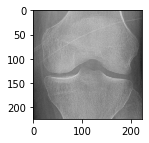

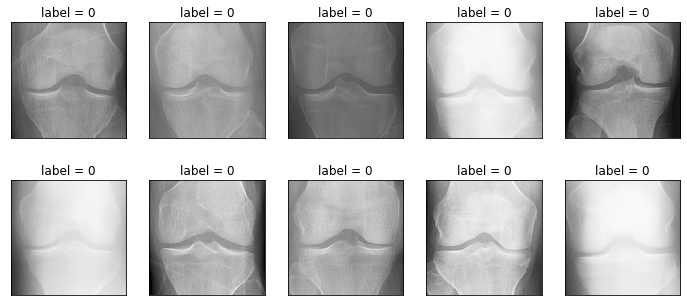

In [28]:
show_image(images_train[0]) 
show_images_labels_predictions(images_train,train_label,[],0,10)    

In [23]:
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

In [29]:
print(train_label_onehot)
len(train_label_onehot)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


5778

In [19]:
#建立模型
model = Sequential()
#建立卷積層1
model.add(Conv2D(filters=10, 
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(224,224,3), 
                 activation='relu'))

#建立池化層1
model.add(MaxPooling2D(pool_size=(2, 2))) #(10,14,14)

#建立卷積層2 padding為得到圖的大小
model.add(Conv2D(filters=20, 
                 kernel_size=(3,3),  
                 padding='same',
                 activation='relu'))

#建立池化層2
model.add(MaxPooling2D(pool_size=(2, 2))) #(20,7,7)

# Dropout層防止過度擬合，斷開比例:0.2
model.add(Dropout(0.2))

#建立平坦層：20*7*7=980 個神經元
model.add(Flatten()) 

#建立隱藏層
model.add(Dense(units=256, activation='relu'))

#建立輸出層
model.add(Dense(units=5,activation='softmax'))

#定義訓練方式
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練10次、每批次讀取200筆資料，顯示簡易訓練過程
train_history =model.fit(x=image_vector_train,
                         y=train_label_onehot, 
                         epochs=20, batch_size=100,verbose=2)

Epoch 1/20
58/58 - 54s - loss: 1.9972 - accuracy: 0.3705
Epoch 2/20
58/58 - 52s - loss: 1.3980 - accuracy: 0.4039
Epoch 3/20
58/58 - 51s - loss: 1.3888 - accuracy: 0.4057
Epoch 4/20
58/58 - 52s - loss: 1.3822 - accuracy: 0.4150
Epoch 5/20
58/58 - 53s - loss: 1.3674 - accuracy: 0.4232
Epoch 6/20
58/58 - 51s - loss: 1.3552 - accuracy: 0.4216
Epoch 7/20
58/58 - 50s - loss: 1.3367 - accuracy: 0.4370
Epoch 8/20
58/58 - 51s - loss: 1.3488 - accuracy: 0.4213
Epoch 9/20
58/58 - 51s - loss: 1.3205 - accuracy: 0.4420
Epoch 10/20
58/58 - 55s - loss: 1.2955 - accuracy: 0.4536
Epoch 11/20
58/58 - 54s - loss: 1.2715 - accuracy: 0.4621
Epoch 12/20
58/58 - 52s - loss: 1.2251 - accuracy: 0.4777
Epoch 13/20
58/58 - 52s - loss: 1.1803 - accuracy: 0.5022
Epoch 14/20
58/58 - 54s - loss: 1.1598 - accuracy: 0.5036
Epoch 15/20
58/58 - 60s - loss: 1.1035 - accuracy: 0.5261
Epoch 16/20
58/58 - 55s - loss: 1.1225 - accuracy: 0.5246
Epoch 17/20
58/58 - 61s - loss: 1.0693 - accuracy: 0.5478
Epoch 18/20
58/58 - 62s

In [20]:
#評估準確率
scores = model.evaluate(image_vector_test, test_label_onehot)
print('\n準確率=',scores[1])

52/52 [==============================] - 7s 114ms/step - loss: 1.2692 - accuracy: 0.4620

準確率= 0.46195653080940247


In [21]:
#預測
prediction=model.predict_classes(image_vector_test)

/Users/charlie/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


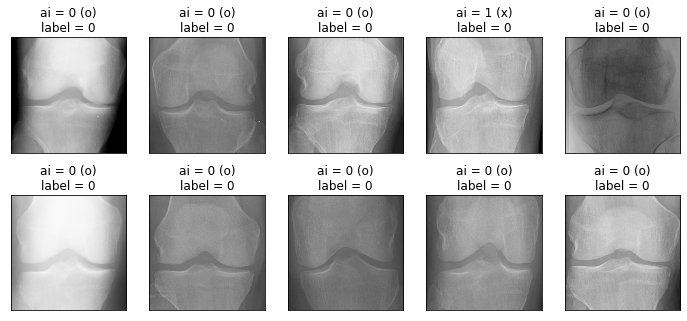

In [28]:
#顯示圖像、預測值、真實值 
show_images_labels_predictions(images_test,test_label,prediction,0)